# "Genetic Algorithm"
### Traveling salesman problem criteria:
* 1. Find the Minimum distance
* 2. Visit every single city
* 3. Don't travel to a city twice

In [2]:
import random
import math
import matplotlib.pyplot as plt

def cities_txt():
    with open("dataset.txt") as f:
        genset = f.read()
        genset = genset.splitlines()
        for i in range(len(genset)):
            genset[i] = genset[i].split()
            genset[i] = [str(genset[i][0]), float(genset[i][1]), float(genset[i][2])]
    cities=genset
    return(cities)

In [3]:
# calculating distance of the cities
def calculate_distances(cities):
    total_dist = 0
    for i in range(len(cities)-1):
        city_1 = cities[i]
        city_2 = cities[i+1]

        distance = math.sqrt(math.pow(city_2[1] - city_1[1], 2) + math.pow(city_2[2] - city_1[2], 2))
        total_dist += distance

    city_1 = cities[0]
    city_2 = cities[-1]
    distance = math.sqrt(math.pow(city_2[1] - city_1[1], 2) + math.pow(city_2[2] - city_1[2], 2))
    total_dist += distance
    return(total_dist)

In [4]:
def generate_population(cities, pop_size):
    population = []
    for i in range(pop_size):
        copied_cities = cities.copy()
        random.shuffle(copied_cities)
        distance = calculate_distances(copied_cities)
        population.append([distance, copied_cities])
        
    fittest = sorted(population)[0]
    return(population, fittest)

In [5]:
def crossover(population, cities_length, tournoment_size, pc):
    pick_pc = random.random()
    if pick_pc < pc:
        parent_1 = sorted(random.choices(population, k=tournoment_size))[0]
        parent_2 = sorted(random.choices(population, k=tournoment_size))[0]
        point = random.randint(0, cities_length-1)

        child_1 = parent_1[1][0:point]
        for chromosome in parent_2[1]:
            if chromosome not in child_1:
                child_1.append(chromosome)

        child_2 = parent_2[1][0:point]
        for chromosome in parent_1[1]:
            if chromosome not in child_2:
                child_2.append(chromosome)

    # If crossover didn't happened
    else:
        child_1 = random.choices(population)[0][1]
        child_2 = random.choices(population)[0][1]
    
    return(child_1, child_2)

In [6]:
def mutation(child_1, child_2, cities_length, pm):
    pick_pm = random.random()
    if pick_pm < pm:
        chromosome_1 = random.randint(0, cities_length - 1)
        chromosome_2 = random.randint(0, cities_length - 1)
        # swapping genes from generated childs
        temp = child_1[chromosome_1]
        child_1[chromosome_1] = child_1[chromosome_2]
        child_1[chromosome_2] = temp

        chromosome_1 = random.randint(0, cities_length - 1)
        chromosome_2 = random.randint(0, cities_length - 1)
        # swapping genes from generated childs
        temp = child_2[chromosome_1]
        child_2[chromosome_1] = child_2[chromosome_2]
        child_2[chromosome_2] = temp
    
    return(child_1, child_2)

In [13]:
def genetic_algorithm(population, generation_size, cities_length, tournoment_size, pm, pc, target):
    gen_number = 0
    for i in range(generation_size):
        new_population = []

        # selecting two of the best options we have
        new_population.append(sorted(population)[0])
        new_population.append(sorted(population)[1])

        for i in range(int((len(population)-2)/2)):
            # --- Crossover --- #
            child_1, child_2 = crossover(population, cities_length, tournoment_size, pc)
            # --- Mutation --- #
            child_1, child_2 = mutation(child_1, child_2, cities_length, pm)
            # --- Created population as the new population --- #
            new_population.append([calculate_distances(child_1), child_1])
            new_population.append([calculate_distances(child_2), child_2])

        # --- Running genetic algorithm again with the new population --- #
        population = new_population
        # --- 'Gen number' is only for visualizing the fitness per 10 populations --- #
        gen_number += 1
        if gen_number % 10 == 0:
            print(f"Population number: {gen_number}", f"- Distance: {sorted(population)[0][0]}")
        # --- Stop cirteria (Solution Founded) --- #
        if sorted(population)[0][0] < target:
            break

    final_population = sorted(population)[0]
    return(final_population)

In [17]:
# visualising the result of the genetic algorithm
def visualize(cities_list, population):
    for city in cities_list:
        # "ro" means red colored circle points
        plt.plot(city[1], city[2], "ro") 
        plt.annotate(city[0], (city[1], city[2]))

    for i in range(len(population[1])):
        try:
            gen_1 = population[1][i]
            gen_2 = population[1][i+1]
            plt.plot([gen_1[1], gen_2[1]], [gen_1[2], gen_2[2]], "blue")
        except:
            continue

    gen_1 = population[1][0]
    gen_2 = population[1][-1]
    plt.plot([gen_1[1], gen_2[1]], [gen_1[2], gen_2[2]], "blue")
    plt.show()

In [18]:
def run():
    cities = cities_txt()
    pop_size = 2000
    tournoment_size = 4
    generation_size = 200
    pm = 0.1
    pc = 0.9
    target = 450.0
    
    initial_population, best_fit_initial_population = generate_population(cities, pop_size)
    result = genetic_algorithm(initial_population, generation_size, len(cities), tournoment_size, pm, pc, target)

    print("\nDistance after training: " + str(result[0]))
    visualize(cities, result)

Population number: 10 - Distance: 987.6652479845307
Population number: 20 - Distance: 779.4377331142632
Population number: 30 - Distance: 660.7503647018643
Population number: 40 - Distance: 577.5533148719742
Population number: 50 - Distance: 550.584516493925
Population number: 60 - Distance: 532.5068627138207
Population number: 70 - Distance: 522.1710609508262
Population number: 80 - Distance: 516.0716070362295
Population number: 90 - Distance: 512.5667507189324
Population number: 100 - Distance: 504.16922509052927
Population number: 110 - Distance: 496.7443078626452
Population number: 120 - Distance: 496.7443078626452
Population number: 130 - Distance: 496.7443078626452
Population number: 140 - Distance: 496.7443078626452
Population number: 150 - Distance: 496.7443078626452
Population number: 160 - Distance: 496.7443078626452
Population number: 170 - Distance: 496.7443078626452
Population number: 180 - Distance: 496.7443078626452
Population number: 190 - Distance: 496.7443078626452
Po

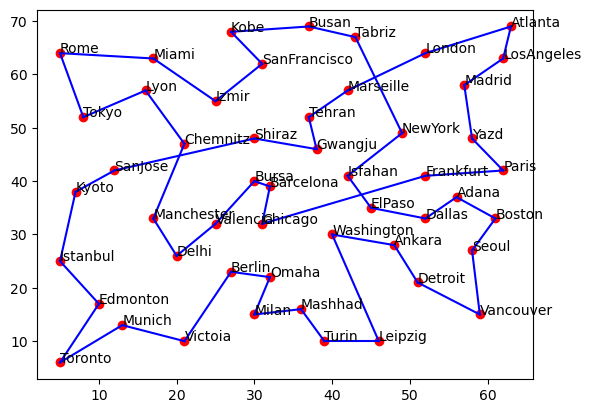

In [19]:
run()